Movie Review Sentiment Analysis

In [1]:
# 0.Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow
import sklearn
import keras

1. Load Data

In [2]:
data_1 = pd.read_csv("rotten_tomatoes_movie_reviews.csv")
data_2 = pd.read_csv("rotten_tomatoes_movies.csv")

2. EDA

In [3]:
data_1.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [4]:
data_1.info

<bound method DataFrame.info of                                         id   reviewId creationDate  \
0                                  beavers    1145982   2003-05-23   
1                               blood_mask    1636744   2007-06-02   
2        city_hunter_shinjuku_private_eyes    2590987   2019-05-28   
3        city_hunter_shinjuku_private_eyes    2558908   2019-02-14   
4                       dangerous_men_2015    2504681   2018-08-29   
...                                    ...        ...          ...   
1444958              thor_love_and_thunder  102706151   2022-07-05   
1444959              thor_love_and_thunder  102706150   2022-07-05   
1444960              thor_love_and_thunder  102706149   2022-07-05   
1444961              thor_love_and_thunder  102706148   2022-07-05   
1444962              thor_love_and_thunder  102706147   2022-07-05   

              criticName  isTopCritic originalScore reviewState  \
0        Ivan M. Lincoln        False         3.5/4       fr

In [5]:
data_2.info

<bound method DataFrame.info of                                                        id  \
0                                      space-zombie-bingo   
1                                         the_green_grass   
2                                               love_lies   
3                                    the_sore_losers_1997   
4                                    dinosaur_island_2002   
...                                                   ...   
143253  nadia_the_secret_of_blue_water_the_motion_pict...   
143254                          everyone_i_knew_and_loved   
143255                                     the-human-body   
143256                                       flying_fists   
143257                                     awakening-2005   

                                                    title  audienceScore  \
0                                     Space Zombie Bingo!           50.0   
1                                         The Green Grass            NaN   
2      

In [6]:
data_2.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [7]:
# By studying above data, it is safe to conclude that Data_2 is not useful and not needed.

In [8]:
data_1.tail()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...


In [9]:
data_1.head(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...


In [10]:
data_1.tail(15)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
1444948,thor_love_and_thunder,102706161,2022-07-05,Ben Kendrick,False,4/5,fresh,Screen Rant,Thor&#58; Love and Thunder is a return to form...,POSITIVE,https://screenrant.com/thor-love-and-thunder-2...
1444949,thor_love_and_thunder,102706160,2022-07-05,Johnny Oleksinski,True,3.5/4,fresh,New York Post,The Marvel Cinematic Universe’s best shot at O...,POSITIVE,https://nypost.com/2022/07/05/thor-love-and-th...
1444950,thor_love_and_thunder,102706159,2022-07-05,Douglas Davidson,False,4/5,fresh,Elements of Madness,&#46;&#46;&#46; &quot;Love and Thunder&quot; i...,POSITIVE,https://elementsofmadness.com/2022/07/05/thor4/
1444951,thor_love_and_thunder,102706158,2022-07-05,Owen Gleiberman,True,NaN,fresh,Variety,By the end I felt something unusual enough to ...,POSITIVE,https://variety.com/2022/film/reviews/thor-lov...
1444952,thor_love_and_thunder,102706157,2022-07-05,Brian Lloyd,False,3/5,fresh,entertainment.ie,It might not be quite as sharp as &apos;Thor&#...,POSITIVE,https://entertainment.ie/movies/movie-reviews/...
1444953,thor_love_and_thunder,102706156,2022-07-05,Therese Lacson,False,A,fresh,Collider,In Love and Thunder&#44; Waititi honors not on...,POSITIVE,https://collider.com/thor-love-and-thunder-rev...
1444954,thor_love_and_thunder,102706155,2022-07-05,David Rooney,True,NaN,rotten,Hollywood Reporter,"The movie feels weightless, flippant, instantl...",NEGATIVE,https://www.hollywoodreporter.com/movies/movie...
1444955,thor_love_and_thunder,102706154,2022-07-05,Kaitlyn Booth,False,7/10,fresh,Bleeding Cool,Thor&#58; Love and Thunder tries to make the R...,POSITIVE,https://bleedingcool.com/movies/thor-love-and-...
1444956,thor_love_and_thunder,102706153,2022-07-05,Tom Jorgensen,False,7/10,fresh,IGN Movies,Thor: Love and Thunder is held back by a cooki...,POSITIVE,https://www.ign.com/articles/thor-love-and-thu...
1444957,thor_love_and_thunder,102706152,2022-07-05,Joey Magidson,False,3.5/4,fresh,Awards Radar,Thor&#58; Love and Thunder continues to show h...,POSITIVE,https://awardsradar.com/2022/07/05/film-review...


a. Counting Word Count In Each Movie Review

In [11]:
data_1['word_count'] = data_1["reviewText"].apply(lambda x: len(str(x).split()))
data_1.head(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,word_count
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...,28
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...,31
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...,40
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...,22
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...,9
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...,24
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...,26
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...,29
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...,21
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...,25


In [12]:
data_1.tail(10)

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,word_count
1444953,thor_love_and_thunder,102706156,2022-07-05,Therese Lacson,False,A,fresh,Collider,In Love and Thunder&#44; Waititi honors not on...,POSITIVE,https://collider.com/thor-love-and-thunder-rev...,35
1444954,thor_love_and_thunder,102706155,2022-07-05,David Rooney,True,NaN,rotten,Hollywood Reporter,"The movie feels weightless, flippant, instantl...",NEGATIVE,https://www.hollywoodreporter.com/movies/movie...,12
1444955,thor_love_and_thunder,102706154,2022-07-05,Kaitlyn Booth,False,7/10,fresh,Bleeding Cool,Thor&#58; Love and Thunder tries to make the R...,POSITIVE,https://bleedingcool.com/movies/thor-love-and-...,32
1444956,thor_love_and_thunder,102706153,2022-07-05,Tom Jorgensen,False,7/10,fresh,IGN Movies,Thor: Love and Thunder is held back by a cooki...,POSITIVE,https://www.ign.com/articles/thor-love-and-thu...,33
1444957,thor_love_and_thunder,102706152,2022-07-05,Joey Magidson,False,3.5/4,fresh,Awards Radar,Thor&#58; Love and Thunder continues to show h...,POSITIVE,https://awardsradar.com/2022/07/05/film-review...,23
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...,17
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...,31
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...,18
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...,17
1444962,thor_love_and_thunder,102706147,2022-07-05,Roger Moore,False,2.5/4,fresh,Movie Nation,It&#8217;s the jokes that make it&#44; with th...,POSITIVE,https://rogersmovienation.com/2022/07/05/movie...,32


In [13]:
# Therefore, the number of words in each review is similar or close

b. Feature Extraction

In [14]:
#Extracted the only features that are required - the actual movie review and the result
data = pd.DataFrame({"Text":data_1["reviewText"], "Sentiment":data_1["scoreSentiment"]})
data.head()

,Text,Sentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


c. Checking Missing Data

In [15]:
data.isnull().sum()

Text         69225
Sentiment        0
dtype: int64

In [16]:
# Checking percentage of missing data
(data["Text"].isnull().sum())*100/len(data["Sentiment"])

np.float64(4.790780109940531)

In [17]:
data.info

<bound method DataFrame.info of                                                       Text Sentiment
0        Timed to be just long enough for most youngste...  POSITIVE
1        It doesn't matter if a movie costs 300 million...  NEGATIVE
2        The choreography is so precise and lifelike at...  POSITIVE
3        The film's out-of-touch attempts at humor may ...  NEGATIVE
4        Its clumsy determination is endearing and some...  POSITIVE
...                                                    ...       ...
1444958  Solid but not totally sold&#44; Thor&#58; Ragn...  POSITIVE
1444959  Thor&#58; Love and Thunder is the most enterta...  POSITIVE
1444960  &quot;Thor&#58; Love and Thunder&quot; is a st...  POSITIVE
1444961  Across Taika Waititi&#8217;s film&#44; a war a...  NEGATIVE
1444962  It&#8217;s the jokes that make it&#44; with th...  POSITIVE

[1444963 rows x 2 columns]>

In [18]:
data = data.dropna()
data.info

<bound method DataFrame.info of                                                       Text Sentiment
0        Timed to be just long enough for most youngste...  POSITIVE
1        It doesn't matter if a movie costs 300 million...  NEGATIVE
2        The choreography is so precise and lifelike at...  POSITIVE
3        The film's out-of-touch attempts at humor may ...  NEGATIVE
4        Its clumsy determination is endearing and some...  POSITIVE
...                                                    ...       ...
1444958  Solid but not totally sold&#44; Thor&#58; Ragn...  POSITIVE
1444959  Thor&#58; Love and Thunder is the most enterta...  POSITIVE
1444960  &quot;Thor&#58; Love and Thunder&quot; is a st...  POSITIVE
1444961  Across Taika Waititi&#8217;s film&#44; a war a...  NEGATIVE
1444962  It&#8217;s the jokes that make it&#44; with th...  POSITIVE

[1375738 rows x 2 columns]>

d. Checking whether data is balanced or not

In [19]:
data["Sentiment"].value_counts()

Sentiment
POSITIVE    922510
NEGATIVE    453228
Name: count, dtype: int64

e. Balancing Data

In [20]:
df = pd.read_csv('neg_reviews.csv')
df.head()

,Text,Sentiment
0,Story of a man who has unnatural feelings for ...,NEGATIVE
1,Airport '77 starts as a brand new luxury 747 p...,NEGATIVE
2,This film lacked something I couldn't put my f...,NEGATIVE
3,"Sorry everyone,,, I know this is supposed to b...",NEGATIVE
4,When I was little my parents took me along to ...,NEGATIVE


In [21]:
import re

In [22]:
def clean_text(text):
    text = re.sub(r",.*?.#", "", text)
    text = text.replace('\n', ' ').strip()
    return text
df['Text'] = df['Text'].apply(clean_text)

In [23]:
df.head()

,Text,Sentiment
0,Story of a man who has unnatural feelings for ...,NEGATIVE
1,Airport '77 starts as a brand new luxury 747 p...,NEGATIVE
2,This film lacked something I couldn't put my f...,NEGATIVE
3,"Sorry everyone,,, I know this is supposed to b...",NEGATIVE
4,When I was little my parents took me along to ...,NEGATIVE


In [24]:
data.head()

,Text,Sentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


In [25]:
data = pd.concat([data, df], ignore_index=True)
data.head()

,Text,Sentiment
0,Timed to be just long enough for most youngste...,POSITIVE
1,It doesn't matter if a movie costs 300 million...,NEGATIVE
2,The choreography is so precise and lifelike at...,POSITIVE
3,The film's out-of-touch attempts at humor may ...,NEGATIVE
4,Its clumsy determination is endearing and some...,POSITIVE


In [26]:
data.tail()

,Text,Sentiment
1388233,"Towards the end of the movie, I felt it was to...",NEGATIVE
1388234,This is the kind of movie that my enemies cont...,NEGATIVE
1388235,I saw 'Descent' last night at the Stockholm Fi...,NEGATIVE
1388236,Some films that you pick up for a pound turn o...,NEGATIVE
1388237,"This is one of the dumbest films, I've ever se...",NEGATIVE


In [27]:
# Successfully added another dataset containing only NEGATIVE reviews into the existing one to decrease class imbalance

In [28]:
data["Sentiment"].value_counts()

Sentiment
POSITIVE    922510
NEGATIVE    465728
Name: count, dtype: int64

In [29]:
# Data is still highly imbalanced

In [30]:
positive_df = data[data["Sentiment"] == "POSITIVE"]
negative_df = data[data["Sentiment"] == "NEGATIVE"]

In [31]:
positive_df = positive_df.sample(frac=0.5, random_state=0)

In [32]:
balanced_df = pd.concat([positive_df, negative_df], ignore_index=True)

In [33]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
balanced_df.head()

,Text,Sentiment
0,Gru is 11&#44; but appears the same age he was...,NEGATIVE
1,Paul Dano seemingly lacks any real charisma of...,NEGATIVE
2,If there was ever a filmmaker in need of someo...,NEGATIVE
3,"Between Jolie's innate cool, and her ability t...",POSITIVE
4,An inviting performance by Golino and some out...,POSITIVE


In [35]:
balanced_df.tail()

,Text,Sentiment
926978,"...it provides full-on thrills, maybe exaggera...",POSITIVE
926979,"A sad, sordid tale of neorealist breath, oxyge...",POSITIVE
926980,A rousing motion picture filled with well-chor...,POSITIVE
926981,"Since it began shooting in June 2006, it's bee...",NEGATIVE
926982,One of the most enjoyable American films ever ...,POSITIVE


In [36]:
balanced_df.info

<bound method DataFrame.info of                                                      Text Sentiment
0       Gru is 11&#44; but appears the same age he was...  NEGATIVE
1       Paul Dano seemingly lacks any real charisma of...  NEGATIVE
2       If there was ever a filmmaker in need of someo...  NEGATIVE
3       Between Jolie's innate cool, and her ability t...  POSITIVE
4       An inviting performance by Golino and some out...  POSITIVE
...                                                   ...       ...
926978  ...it provides full-on thrills, maybe exaggera...  POSITIVE
926979  A sad, sordid tale of neorealist breath, oxyge...  POSITIVE
926980  A rousing motion picture filled with well-chor...  POSITIVE
926981  Since it began shooting in June 2006, it's bee...  NEGATIVE
926982  One of the most enjoyable American films ever ...  POSITIVE

[926983 rows x 2 columns]>

In [37]:
balanced_df["Sentiment"].value_counts()

Sentiment
NEGATIVE    465728
POSITIVE    461255
Name: count, dtype: int64

In [38]:
# Therefore, data is now balanced!

3. Data Preprocessing

a. Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
balanced_df["Sentiment"] = encoder.fit_transform(balanced_df["Sentiment"])

In [40]:
balanced_df.head()

,Text,Sentiment
0,Gru is 11&#44; but appears the same age he was...,0
1,Paul Dano seemingly lacks any real charisma of...,0
2,If there was ever a filmmaker in need of someo...,0
3,"Between Jolie's innate cool, and her ability t...",1
4,An inviting performance by Golino and some out...,1


In [41]:
# Therefore, 0 is Negative, and 1 is Positive!

b. Tokenization/Vectorization

In [42]:
x = balanced_df["Text"]

In [43]:
tensorflow.__version__

'2.19.0'

In [44]:
from tensorflow.keras.layers import TextVectorization

In [45]:
# Parameters
vocab_size = 10000
max_len = 40

In [46]:
vectorizer = TextVectorization(
    max_tokens = vocab_size,
    output_mode = 'int',
    output_sequence_length = max_len
)

In [47]:
texts = balanced_df['Text'].astype(str)
texts_tf = tensorflow.data.Dataset.from_tensor_slices(texts).batch(32)
vectorizer.adapt(texts_tf)

In [48]:
vectorized_text = vectorizer(texts)

In [49]:
# Therefore, preprocessing is finally done!

4. Split data into train, test and validation sets

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Splitting into input and output
x = balanced_df["Text"]
y = balanced_df["Sentiment"]

In [52]:
# Splitting into train and the rest
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
# Splitting the rest of the data into test and validation
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42, stratify=y_rest)

In [54]:
x_train = vectorizer(x_train)
x_val = vectorizer(x_val)
x_test = vectorizer(x_test)

In [55]:
# Splitting done succesfully!

5. Building The Model Architecture

In [56]:
# We are using LSTM

In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [58]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

6. Compiling the model

In [59]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [60]:
# Checking a few things before training

In [61]:
print(y_val[:10])

925247    0
882961    0
856040    0
107345    0
600856    1
157767    1
763114    1
338817    0
23337     1
487070    0
Name: Sentiment, dtype: int64


In [62]:
print(set(y_val))

{0, 1}


In [63]:
print(x_val.shape)

(139047, 40)


7. Training The Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (x_val, y_val)
)

Epoch 1/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 518s 25ms/step - accuracy: 0.7800 - loss: 0.4495 - val_accuracy: 0.8422 - val_loss: 0.3533
Epoch 2/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 617s 30ms/step - accuracy: 0.8552 - loss: 0.3296 - val_accuracy: 0.8484 - val_loss: 0.3428
Epoch 3/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 575s 28ms/step - accuracy: 0.8741 - loss: 0.2942 - val_accuracy: 0.8516 - val_loss: 0.3405
Epoch 4/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 441s 22ms/step - accuracy: 0.8900 - loss: 0.2619 - val_accuracy: 0.8489 - val_loss: 0.3464
Epoch 5/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 767s 38ms/step - accuracy: 0.9056 - loss: 0.2304 - val_accuracy: 0.8464 - val_loss: 0.3675
Epoch 6/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 799s 39ms/step - accuracy: 0.9185 - loss: 0.2027 - val_accuracy: 0.8439 - val_loss: 0.3921
Epoch 7/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 1029s 51ms/step - accuracy: 0.9304 - loss: 0.1758 - val_accuracy: 0.8389 - val_loss: 0.4189
Epoch 8/10
20278/20278 ━━━━━━━━━━━━━━━━━━━━ 549s 27ms/

8. Evaluating the model on validation data

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(loss)
print(accuracy)

4346/4346 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8331 - loss: 0.5150
0.517019510269165
0.8322581648826599


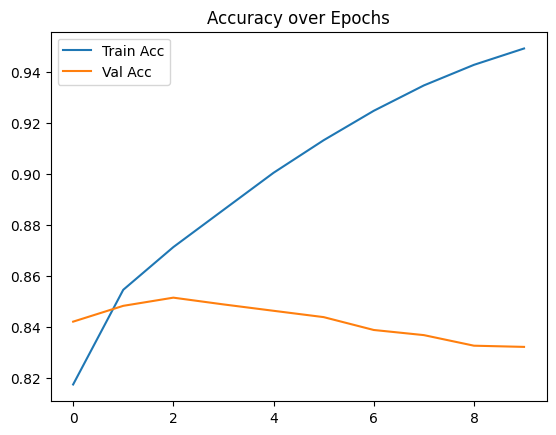

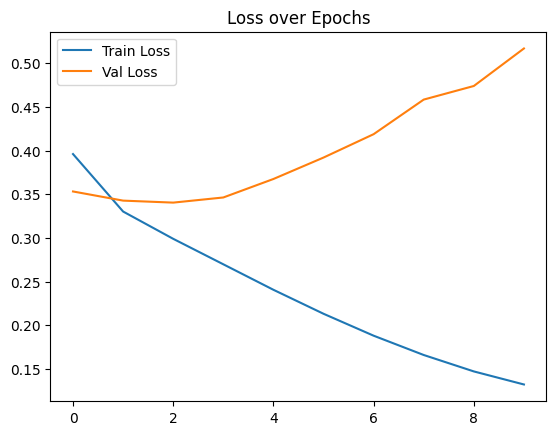

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [ ]:
keras.saving.save_model(model, 'Sentiment_Analysis.keras')

In [ ]:
model.save("Sentiment_Analysis_2.h5")

9. Tuning Hyperparameters

In [65]:
# After evaluating the model, we can confirm that the model is overfitting. We need to tune the hyperparameters to make it better

In [66]:
# Building the model architecture again

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


In [76]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2, activation='relu'),
    Dropout(0.3),
    LSTM(32, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    Dropout(0.3),
    LSTM(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [70]:
# Compiling the model

In [77]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [78]:
# Adding early stopping

In [79]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    restore_best_weights=True
)

In [80]:
# Training the model again

In [82]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 16,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping]
)

Epoch 1/10
   14/40556 ━━━━━━━━━━━━━━━━━━━━ 18:59 28ms/step - accuracy: 0.5619 - loss: 0.6917

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(loss)
print(accuracy)

4346/4346 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.5020 - loss: 0.6932
0.6931467056274414
0.5024128556251526


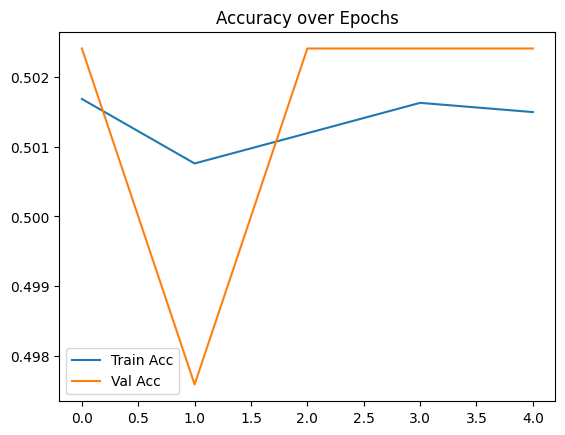

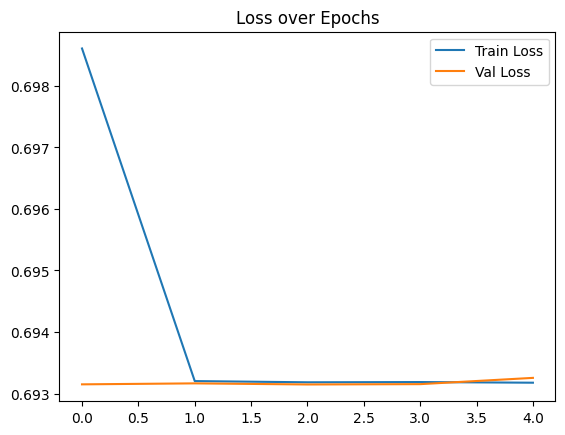

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [ ]:
keras.saving.save_model(model, 'Model_3.keras')

In [ ]:
model.save('Model_4.h5')